# Keyboard Layout Optimizer

This program analyzes and optimizes a keyboard layout to minimize finger travel distance based on a given input text using the optimization technique of Simulated Annealing. The script performs the following key tasks:

1. **Keyboard Layout**: It defines the QWERTY layout by mapping each key to its position and specifying the starting finger used to type each key.

2. **Character Frequency Analysis**: The program counts the frequency of each character and modifier key (such as Shift) in the input text.

3. **Distance Calculation**: It calculates the total finger travel distance for typing a given character or the entire input based on the current layout.

4. **Simulated Annealing Optimization**: The layout is optimized using a simulated annealing algorithm, where keys are swapped to reduce the overall typing distance.

5. **Visualization**: The script then visualizes the keyboard layout as a heatmap, highlighting the frequency of key presses. It displays both the original and optimized layouts.

Functions:
- `letter_count()`: Counts the frequency of each character in the input.
- `distance()`: Calculates the Euclidean distance between two keys.
- `calc_distance()`: Computes the total distance for typing a single character.
- `optimize_layout()`: Uses simulated annealing to optimize the keyboard layout.
- `draw_key()`: Draws a key on the keyboard layout plot.
- `visualize_keyboard()`: Visualizes the keyboard layout with a frequency heatmap.
- `analyze_text()`: Analyzes the input text, calculates typing distance, and visualizes the layout.
- `analyze_and_optimize()`: Combines text analysis and layout optimization, visualizing both the original and optimized layouts.

This script can be used to experiment with different input strings.


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import Normalize
from collections import Counter
import copy
import random


# QWERTY layout: keys and their positions
qwerty_keys = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'd'},
    '5': {'pos': (5, 4), 'start': 'f'},
    '6': {'pos': (6, 4), 'start': 'j'},
    '7': {'pos': (7, 4), 'start': 'j'},
    '8': {'pos': (8, 4), 'start': 'k'},
    '9': {'pos': (9, 4), 'start': 'l'},
    '0': {'pos': (10, 4), 'start': ';'},
    '-': {'pos': (11, 4), 'start': ';'},
    '=': {'pos': (12, 4), 'start': ';'},

    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 's'},
    'e': {'pos': (3.5, 3), 'start': 'd'},
    'r': {'pos': (4.5, 3), 'start': 'f'},
    't': {'pos': (5.5, 3), 'start': 'f'},
    'y': {'pos': (6.5, 3), 'start': 'j'},
    'u': {'pos': (7.5, 3), 'start': 'j'},
    'i': {'pos': (8.5, 3), 'start': 'k'},
    'o': {'pos': (9.5, 3), 'start': 'l'},
    'p': {'pos': (10.5, 3), 'start': ';'},
    '[': {'pos': (11.5, 3), 'start': ';'},
    ']': {'pos': (12.5, 3), 'start': ';'},
    '\\': {'pos': (13.5, 3), 'start': ';'},

    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    's': {'pos': (2.75, 2), 'start': 's'},
    'd': {'pos': (3.75, 2), 'start': 'd'},
    'f': {'pos': (4.75, 2), 'start': 'f'},
    'g': {'pos': (5.75, 2), 'start': 'f'},
    'h': {'pos': (6.75, 2), 'start': 'j'},
    'j': {'pos': (7.75, 2), 'start': 'j'},
    'k': {'pos': (8.75, 2), 'start': 'k'},
    'l': {'pos': (9.75, 2), 'start': 'l'},
    ';': {'pos': (10.75, 2), 'start': ';'},
    "'": {'pos': (11.75, 2), 'start': ';'},

    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 's'},
    'c': {'pos': (4.25, 1), 'start': 'd'},
    'v': {'pos': (5.25, 1), 'start': 'f'},
    'b': {'pos': (6.25, 1), 'start': 'f'},
    'n': {'pos': (7.25, 1), 'start': 'j'},
    'm': {'pos': (8.25, 1), 'start': 'j'},
    ',': {'pos': (9.25, 1), 'start': 'k'},
    '.': {'pos': (10.25, 1), 'start': 'l'},
    '/': {'pos': (11.25, 1), 'start': ';'},

    # Special keys
    'Shift_L': {'pos': (0, 0), 'start': 'a'},
    'Shift_R': {'pos': (12.5, 0), 'start': ';'},
    'Ctrl_L': {'pos': (0, -1), 'start': 'a'},
    'Alt_L': {'pos': (2, -1), 'start': 'a'},
    'Space': {'pos': (5, -1), 'start': 'f'},
    'Alt_R': {'pos': (8, -1), 'start': 'j'},
    'Ctrl_R': {'pos': (10, -1), 'start': ';'},
}

# QWERTY characters: mapping of characters to key sequences
qwerty_characters = {
    # Lowercase letters
    'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
    'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
    'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
    'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
    'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
    'z': ('z',),

    # Uppercase letters
    'A': ('Shift_L', 'a'), 'B': ('Shift_L', 'b'), 'C': ('Shift_L', 'c'),
    'D': ('Shift_L', 'd'), 'E': ('Shift_L', 'e'), 'F': ('Shift_L', 'f'),
    'G': ('Shift_L', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
    'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
    'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
    'P': ('Shift_L', 'p'), 'Q': ('Shift_L', 'q'), 'R': ('Shift_L', 'r'),
    'S': ('Shift_L', 's'), 'T': ('Shift_L', 't'), 'U': ('Shift_L', 'u'),
    'V': ('Shift_L', 'v'), 'W': ('Shift_L', 'w'), 'X': ('Shift_L', 'x'),
    'Y': ('Shift_L', 'y'), 'Z': ('Shift_L', 'z'),

    # Numbers and their shifted symbols
    '1': ('1',), '!': ('Shift_L', '1'),
    '2': ('2',), '@': ('Shift_L', '2'),
    '3': ('3',), '#': ('Shift_L', '3'),
    '4': ('4',), '$': ('Shift_L', '4'),
    '5': ('5',), '%': ('Shift_L', '5'),
    '6': ('6',), '^': ('Shift_L', '6'),
    '7': ('7',), '&': ('Shift_L', '7'),
    '8': ('8',), '*': ('Shift_L', '8'),
    '9': ('9',), '(': ('Shift_L', '9'),
    '0': ('0',), ')': ('Shift_L', '0'),

    # Other symbols
    '`': ('`',), '~': ('Shift_L', '`'),
    '-': ('-',), '_': ('Shift_L', '-'),
    '=': ('=',), '+': ('Shift_L', '='),
    '[': ('[',), '{': ('Shift_L', '['),
    ']': (']',), '}': ('Shift_L', ']'),
    '\\': ('\\',), '|': ('Shift_L', '\\'),
    ';': (';',), ':': ('Shift_L', ';'),
    "'": ("'",), '"': ('Shift_L', "'"),
    ',': (',',), '<': ('Shift_L', ','),
    '.': ('.',), '>': ('Shift_L', '.'),
    '/': ('/',), '?': ('Shift_L', '/'),

    # Space
    ' ': ('Space',),
}

def letter_count(text: str, layout: str) -> dict:
    """
    Counts the frequency of each character and necessary modifier keys in the text.
    Args: text: The input text string.
          layout: The keyboard layout identifier (only 'qwerty' supported).
    Returns: A dictionary with keys as key names and values as their frequencies.
    """
    charac = {"Shift_L": 0, "Shift_R": 0}
    if layout == "qwerty":
        chosen_characters = qwerty_characters
    else:
        raise ValueError("Only 'qwerty' layout available.")

    for char in text:
        if char in chosen_characters:
            key_sequence = chosen_characters[char]
            for key in key_sequence:
                if key in charac:
                    charac[key] += 1
                else:
                    charac[key] = 1
    return charac

def distance(pos1: tuple[int, int], pos2: tuple[int, int]) -> float:
    """
    Calculates the Euclidean distance between two positions on the keyboard.
    Args: pos1: The position of the first key as a (x, y) tuple.
          pos2: The position of the second key as a (x, y) tuple.
    Returns: The Euclidean distance between the two positions.
    """
    return ((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2) ** 0.5

def calc_distance(char: str, keys: dict[str, dict], characters: dict[str, tuple[str]]) -> float:
    """
    Calculates the total finger travel distance to type a single character.
    Args: char: The character to be typed.
          keys: A dictionary containing keyboard layout information with key positions.
          characters: A dictionary mapping characters to their corresponding key sequences.
    Returns: The total distance traveled by fingers to type the character.
    """
    total = 0
    info = characters[char]
    key1 = info[0]
    start_letter = keys[key1]["start"]
    pos1 = keys[key1]["pos"]
    pos2 = keys[start_letter]["pos"]
    total += distance(pos1, pos2)

    if len(info) > 1:
        key2 = info[1]
        start_letter = keys[key2]["start"]
        pos1 = keys[key2]["pos"]
        pos2 = keys[start_letter]["pos"]
        total += distance(pos1, pos2)

    return total

import copy
import random
import math

def optimize_layout(text: str, layout: dict, characters: dict, initial_temp: float = 100, cooling_rate: float = 0.99, max_iterations: int = 10000) -> dict:
    """
    Optimizes the keyboard layout using simulated annealing to minimize finger travel distance.
    """
    optimized_layout = copy.deepcopy(layout)
    current_distance = 0
    for i in text:
        current_distance += calc_distance(i, optimized_layout, characters)
    best_layout = copy.deepcopy(optimized_layout)
    best_distance = current_distance
    temp = initial_temp

    fixed_keys = {'Space','Shift_R','Shift_L','Ctrl_L', 'Ctrl_R', 'Alt_L', 'Alt_R'}  # Fixed keys that are not moved while optimizing

    for it in range(max_iterations):
        # Randomly swap two non-fixed keys
        keys = [key for key in optimized_layout.keys() if key not in fixed_keys]
        key1, key2 = random.sample(keys, 2)

        # Update characters mapping before swapping
        characters[key1], characters[key2] = characters[key2], characters[key1]  # Swap the characters

        # Swap positions in the layout
        optimized_layout[key1]['pos'], optimized_layout[key2]['pos'] = optimized_layout[key2]['pos'], optimized_layout[key1]['pos']
        new_distance = 0
        for i in text:
            new_distance += calc_distance(i, optimized_layout, characters)


        if new_distance < current_distance:
            current_distance = new_distance
            if new_distance < best_distance:
                best_distance = new_distance
                best_layout = copy.deepcopy(optimized_layout)
        else:
            acceptance_probability = math.exp((current_distance - new_distance) / temp)
            if random.random() < acceptance_probability:
                current_distance = new_distance
            else:
                # Revert the swap
                optimized_layout[key1]['pos'], optimized_layout[key2]['pos'] = optimized_layout[key2]['pos'], optimized_layout[key1]['pos']
                # Revert the characters mapping
                characters[key1], characters[key2] = characters[key2], characters[key1]
        temp *= cooling_rate

        if it % 100 == 0:
            print(f"Iteration {it}: Best Distance: {best_distance:.2f}, Current Distance: {current_distance:.2f}")

    return best_layout

def draw_key(ax: plt.Axes, pos: tuple, key: str, freq: int, size: tuple = (0.75, 0.75), cmap=plt.cm.jet, norm: Normalize = None) -> None:
    """
    Draws a single key on the keyboard layout visualization.
    Args: ax: The matplotlib axes object where the key will be drawn.
          pos: A tuple representing the (x, y) coordinates of the key.
          key: The text label for the key.
          freq: The frequency of occurrence of the key in the input text.
          size: A tuple representing the key's size, here set to (0.75, 0.75).
          cmap: The colormap used for coloring the key based on frequency.
          norm: A normalization object for mapping frequencies to color values.
    """
    x, y = pos
    color = cmap(norm(freq)) if norm else "white" if freq == 0 else cmap(0.0)
    rect = FancyBboxPatch(
        (x - size[0]/2, y - size[1]/2),
        size[0],
        size[1],
        boxstyle="round,pad=0.1",
        linewidth=1,
        edgecolor="grey",
        facecolor=color
    )
    ax.add_patch(rect)
    ax.text(x, y, key, ha="center", va="center", fontsize=12, color="black")

def visualize_keyboard(heatmap: dict, layout: dict, title: str = "Keyboard Layout") -> None:
    """
    Visualizes the keyboard layout with a heatmap showing key frequencies.
    Args: heatmap: A dictionary where keys are key names and values are frequencies.
          layout: The keyboard layout dictionary containing key positions.
          title: The title of the plot.
    """
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.set_xlim(-1, 14)
    ax.set_ylim(-2, 5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=16)

    max_freq = max(heatmap.values()) if heatmap else 1
    norm = Normalize(vmin=0, vmax=max_freq)
    cmap = plt.cm.Blues

    for key, info in layout.items():
        x, y = info['pos']
        freq = heatmap.get(key, 0)
        draw_key(ax, (x, y), key, freq, cmap=cmap, norm=norm)

    plt.show()

def analyze_text(text: str, layout: dict, characters: dict) -> None:
    """
    Analyzes the input text, calculates total typing distance, and visualizes the keyboard layout.
    Args: text: The input text string.
          layout: The keyboard layout dictionary.
          characters: The character to key sequence mapping.
    """
    # Count character frequencies
    frequencies = letter_count(text, "qwerty")

    # Calculate total typing distance
    total_distance = 0
    for i in text:
        total_distance += calc_distance(i, layout, characters)
    print(f"Total typing distance: {total_distance:.2f} units")

    # Visualize the keyboard heatmap
    visualize_keyboard(frequencies, layout, title="Keyboard Layout")

def analyze_and_optimize(text: str, layout: dict, characters: dict, iterations: int = 100) -> None:
    """
    Analyzes the input text, visualizes the original layout, optimizes the layout, and visualizes the optimized layout.
    Args: text: The input text string.
          layout: The keyboard layout dictionary.
          characters: The character to key sequence mapping.
          iterations: Number of optimization iterations.
    """
    print("Analyzing original layout\n")
    analyze_text(text, layout, characters)

    print("Optimizing keyboard layout\n")
    optimized_layout = optimize_layout(text, layout, characters)

    # Recount frequencies based on optimized layout(would remain the same)
    optimized_frequencies = letter_count(text, "qwerty")

    # Calculate total typing distance for optimized layout
    optimized_distance = 0
    for i in text:
        optimized_distance += calc_distance(i, optimized_layout, characters)
    print(f"Optimized total typing distance: {optimized_distance:.2f} units")

    # Visualize the optimized keyboard heatmap
    visualize_keyboard(optimized_frequencies, optimized_layout, title="Keyboard Layout")



# Adding your own inputs:
To customize the program for your own input, simply replace the input_text variable with the text you wish to analyze. This text can be any string, such as a paragraph or sentence, and the program will automatically analyze the keyboard usage patterns for that input. The script then prints the original analysis based on the standard QWERTY keyboard layout, runs an optimization process to minimize finger travel distance, and displays the optimized keyboard analysis.

length of the input string 536
Original Keyboard Analysis:
Total typing distance: 664.47 units


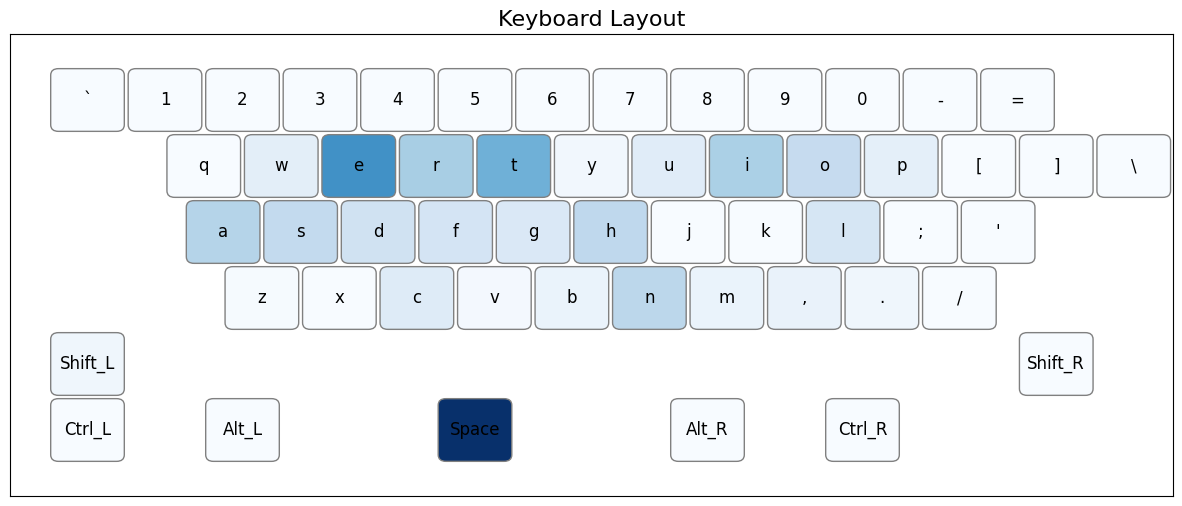

Starting Optimization Process:

Iteration 0: Best Distance: 664.47, Current Distance: 669.93
Iteration 100: Best Distance: 664.47, Current Distance: 1271.85
Iteration 200: Best Distance: 664.47, Current Distance: 965.61
Iteration 300: Best Distance: 664.47, Current Distance: 736.08
Iteration 400: Best Distance: 570.22, Current Distance: 570.22
Iteration 500: Best Distance: 542.92, Current Distance: 542.92
Iteration 600: Best Distance: 489.71, Current Distance: 489.71
Iteration 700: Best Distance: 435.45, Current Distance: 435.45
Iteration 800: Best Distance: 433.34, Current Distance: 433.34
Iteration 900: Best Distance: 433.34, Current Distance: 433.34
Iteration 1000: Best Distance: 433.34, Current Distance: 433.34
Iteration 1100: Best Distance: 408.93, Current Distance: 408.93
Iteration 1200: Best Distance: 408.93, Current Distance: 408.93
Iteration 1300: Best Distance: 395.95, Current Distance: 395.95
Iteration 1400: Best Distance: 395.03, Current Distance: 395.03
Iteration 1500: Bes

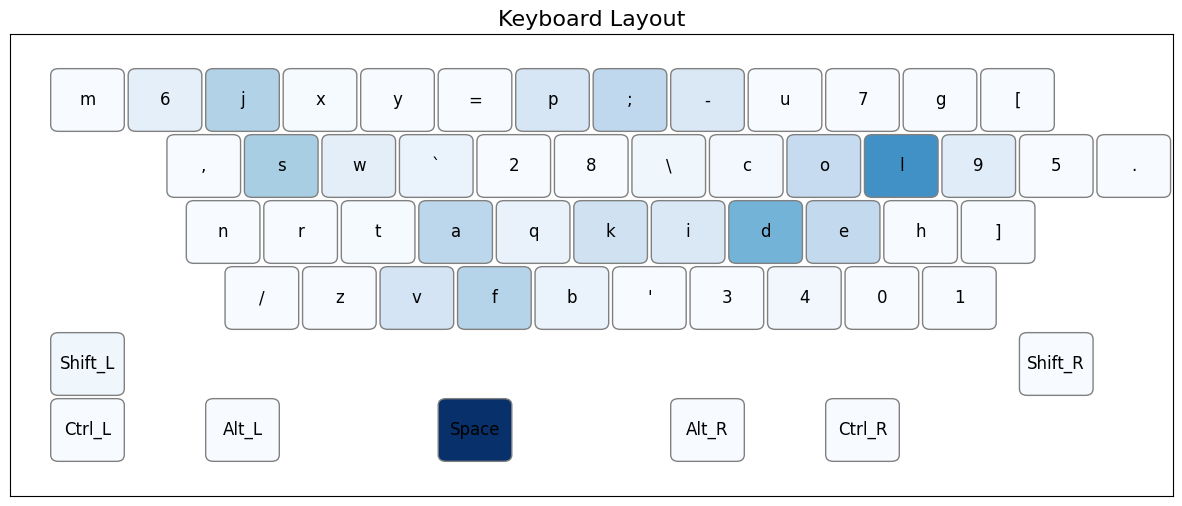

In [3]:
if __name__ == "__main__":
    input_text = "The gentle rustle of leaves in the wind carried a whisper of calm through the air, as the sun dipped below the horizon, casting a warm golden glow across the landscape. Birds fluttered from tree to tree, their wings catching the fading light as they settled into their nests for the night. In the distance, the faint sound of a river could be heard, its waters glistening under the soft twilight. It was a moment of pure serenity, a perfect blend of natures beauty and peace, offering a brief respite from the hurried pace of the world."
    print("length of the input string", len(input_text))
    print("Original Keyboard Analysis:")
    analyze_text(input_text, qwerty_keys, qwerty_characters)
    print("Starting Optimization Process:\n")
    optimized_qwerty_keys = optimize_layout(input_text, qwerty_keys, qwerty_characters)
    print("Optimized Keyboard Analysis:")
    analyze_text(input_text, optimized_qwerty_keys, qwerty_characters)